In [2]:
import ROOT as rt
# import root_numpy as rtnp
import csv
import re
import sys
import collections
from collections import OrderedDict
import uproot
import numpy as np
from matplotlib import pyplot as plt
sys.path.append('/nfshome/christiw/llp/delayed_jet_analyzer/lib/')
from histo_utilities import create_TH1D, create_TH2D, std_color_list

# import CMS_lumi, tdrstyle
# tdrstyle.setTDRStyle()
# CMS_lumi.writeExtraText = 1
# CMS_lumi.extraText = "     Simulation Preliminary"

# donotdelete = []
print(sys.version)

2.7.12 (default, Nov 19 2016, 06:48:10) 
[GCC 5.4.0 20160609]


In [70]:
fpath =OrderedDict()
tree = OrderedDict()
bbbb = 1
fpath['mh125'] = '/home/cms/Desktop/LLP/jetNtuple_RunIISummer16/withoutISR/jetNtuple_glueball/jet_timing_studies_ntuple_mh125_mx50_pl1000_ev10000.root'
if bbbb:
    fpath['mh125'] = '/nfshome/christiw/llp/jetNtuple_RunIISummer16/withISR/bbbb/jet_timing_studies_ntuple_bbbb_ISR_mh125_mx50_pl1000_ev100000_1pb_weighted.root'
    fpath['mh300'] = '/nfshome/christiw/llp/jetNtuple_RunIISummer16/withISR/bbbb/jet_timing_studies_ntuple_bbbb_vbfh_ggh_ISR_mh300_mx125_pl1000_ev100000_1pb_weighted.root'
    fpath['mh500'] = '/nfshome/christiw/llp/jetNtuple_RunIISummer16/withISR/bbbb/jet_timing_studies_ntuple_bbbb_vbfh_ggh_ISR_mh500_mx225_pl1000_ev100000_1pb_weighted.root'
    fpath['mh1000'] = '/nfshome/christiw/llp/jetNtuple_RunIISummer16/withISR/bbbb/jet_timing_studies_ntuple_bbbb_vbfh_ggh_ISR_mh1000_mx475_pl1000_ev100000_1pb_weighted.root'
    fpath['mh2000'] = '/nfshome/christiw/llp/jetNtuple_RunIISummer16/withISR/bbbb/jet_timing_studies_ntuple_bbbb_ISR_mh2000_mx975_pl1000_ev100000_1pb_weighted.root'

else:
    fpath['mh125_noisr'] = '/nfshome/christiw/llp/jetNtuple_RunIISummer16/withoutISR/jetNtuple_glueball/jet_timing_studies_ntuple_mh125_mx50_pl1000_ev10000_1pb_weighted.root'
    fpath['mh125'] = '/nfshome/christiw/llp/jetNtuple_RunIISummer16/withISR/met_bb/jet_timing_studies_ntuple_ISR_mh125_mx50_pl1000_ev100000_1pb_weighted.root'
    fpath['mh300'] = '/nfshome/christiw/llp/jetNtuple_RunIISummer16/withISR/met_bb/jet_timing_studies_ntuple_vbfh_ggh_ISR_mh300_mx125_pl1000_ev100000_1pb_weighted.root'
    fpath['mh500'] = '/nfshome/christiw/llp/jetNtuple_RunIISummer16/withISR/met_bb/jet_timing_studies_ntuple_vbfh_ggh_ISR_mh500_mx225_pl1000_ev100000_1pb_weighted.root'
    fpath['mh1000'] = '/nfshome/christiw/llp/jetNtuple_RunIISummer16/withISR/met_bb/jet_timing_studies_ntuple_ISR_mh1000_mx475_pl1000_ev100000_1pb_weighted.root'
    fpath['mh2000'] = '/nfshome/christiw/llp/jetNtuple_RunIISummer16/withISR/met_bb/jet_timing_studies_ntuple_ISR_mh2000_mx975_pl1000_ev100000_1pb_weighted.root'
# fpath['test'] = '/data/christiw/LLP/CMSSW_9_4_4/src/cms_lpc_llp/jet_timing_studies/python/withISR_bbbb/jet_timing_studies_ntuple_bbbb_ggh_ISR_mh1000_mx475_pl1000_ev100000.root'


for k,v in fpath.items():
    print (k, v)
#     tree[k] = rtnp.root2array(v)
    root_dir = uproot.open(v) 
    tree[k] = root_dir['llp']
#     tree[k] = root_dir['ntuples']
    a = tree[k]["jetPt"].array()
    print (a[:-1][0])
    
    
trigger_names_file = '/nfshome/christiw/llp/delayed_jet_analyzer/data/trigger_names_llp_v1.dat'
trigger_names = []
with open(trigger_names_file) as f:
    reader = csv.reader(f, delimiter=" ")
    for line in reader:
        trigger_names.append(line[2])

('mh125', '/nfshome/christiw/llp/jetNtuple_RunIISummer16/withISR/bbbb/jet_timing_studies_ntuple_bbbb_ISR_mh125_mx50_pl1000_ev100000_1pb_weighted.root')
[37.968555 29.015484]
('mh300', '/nfshome/christiw/llp/jetNtuple_RunIISummer16/withISR/bbbb/jet_timing_studies_ntuple_bbbb_vbfh_ggh_ISR_mh300_mx125_pl1000_ev100000_1pb_weighted.root')
[75.25953  44.712708 39.259647 31.787437 30.52393  23.585522]
('mh500', '/nfshome/christiw/llp/jetNtuple_RunIISummer16/withISR/bbbb/jet_timing_studies_ntuple_bbbb_vbfh_ggh_ISR_mh500_mx225_pl1000_ev100000_1pb_weighted.root')
[54.80164  47.178917 40.454414 26.939667]
('mh1000', '/nfshome/christiw/llp/jetNtuple_RunIISummer16/withISR/bbbb/jet_timing_studies_ntuple_bbbb_vbfh_ggh_ISR_mh1000_mx475_pl1000_ev100000_1pb_weighted.root')
[111.03039  107.96666   92.03526   86.79972   70.54433   27.516436]
('mh2000', '/nfshome/christiw/llp/jetNtuple_RunIISummer16/withISR/bbbb/jet_timing_studies_ntuple_bbbb_ISR_mh2000_mx975_pl1000_ev100000_1pb_weighted.root')
[325.80865 

In [71]:
trigger_paths = [84,136,196,310] #PFMET120
print(trigger_names[84])
print(trigger_names[136])

HLT_Ele30_WPTight_Gsf
HLT_IsoMu27


In [72]:
# inclusive trigger efficiency * acceptance
trigger_decision = {}
mu_bool = {}
ele_bool = {}
both_llp = {}
higgs_pt = {}
llp_pt = OrderedDict()
weight = {}
pfmet = OrderedDict()
for k,T in tree.items():
    gParticleId = T['gParticleId'].array()
    gParticleMotherIndex = T['gParticleMotherIndex'].array()
    gParticleStatus = T['gParticleStatus'].array()
    gLLP_daughter_pt = T['gLLP_daughter_pt'].array()
    gLLP_daughter_eta = T['gLLP_daughter_eta'].array()
    gLLP_daughter_phi = T['gLLP_daughter_phi'].array()
    gLLP_daughter_e = T['gLLP_daughter_e'].array()
    hlt = T['HLTDecision'].array()
    mcweight = T['weight'].array()
    nEvents = len(T['eventNum'].array())
    pfmet[k] = T['pfMetPt'].array()

    mu_bool[k] = []
    ele_bool[k] = []
    both_llp[k] = []
    llp_pt[k] = np.zeros((nEvents,2))
    higgs_pt[k] = []
    trigger_decision[k] = {}
    for tr in trigger_paths:
        trigger_decision[k][tr] = []
        
    for i in range(nEvents):
        
        higgs_vec = rt.TLorentzVector()
        llp1_vec = rt.TLorentzVector()
        llp2_vec = rt.TLorentzVector()
        for j in range(4):
            temp = rt.TLorentzVector()
            temp.SetPtEtaPhiE(gLLP_daughter_pt[i][j],gLLP_daughter_eta[i][j],gLLP_daughter_phi[i][j],gLLP_daughter_e[i][j])
            higgs_vec += temp
            if j<=1:
                llp1_vec += temp
            else:
                llp2_vec += temp
#         llp_pt[k].append(max(llp1_vec.Pt(),llp2_vec.Pt()))
        llp_pt[k][i] = [llp1_vec.Pt(),llp2_vec.Pt()]
        higgs_pt[k].append(higgs_vec.Pt())
        for tr in trigger_paths:
            trigger_decision[k][tr].append(hlt[i][tr])
        #choose only events with 1 muon
        mu = np.logical_and(np.logical_and(np.absolute(gParticleId[i]) == 13,  gParticleMotherIndex[i] == 1), gParticleStatus[i] == 1 )
    #     if np.count_nonzero(mu) <= 2 and np.count_nonzero(mu) > 0: #has 1 or 2 muon
        if np.count_nonzero(mu) <=2 and np.count_nonzero(mu)>0:
            mu_bool[k].append(True)
        else:
            mu_bool[k].append(False)
        ele = np.logical_and(np.logical_and(np.absolute(gParticleId[i]) == 11,  gParticleMotherIndex[i] == 1), gParticleStatus[i] == 1 )
        if np.count_nonzero(ele) <= 2 and np.count_nonzero(ele) > 0: #has 1 or 2 ele
            ele_bool[k].append(True)
        else:
            ele_bool[k].append(False)
    weight[k] = mcweight*140 #corresponding to 140 pb
    higgs_pt[k] = np.array(higgs_pt[k])
    mu_bool[k] = np.array(mu_bool[k])
    ele_bool[k] = np.array(ele_bool[k])
    both_llp[k] = np.array(both_llp[k])
    llp_pt[k] = np.array(llp_pt[k])
    for tr in trigger_paths:
        trigger_decision[k][tr] = np.array(trigger_decision[k][tr])
    assert(len(mu_bool[k]) == len(llp_pt[k]))
    print("processed tree "+k)


processed tree mh125
processed tree mh300
processed tree mh500
processed tree mh1000
processed tree mh2000


In [73]:
legend = {
    'mh2000':"(mh, mx)=(2000,975) GeV",    
    'mh1000':"(mh, mx)=(1000,475) GeV", 
    'mh500':"(mh, mx)=(500,225) GeV", 
    'mh300':"(mh, mx)=(300,125) GeV", 
    'mh125':"(mh, mx)=(125,50) GeV",
    'mh125_noisr':"(mh, mx)=(125,50) GeV" ,
}
# legend = {
#     'mh2000':"(mh, mx)=(2000,975) GeV, with ISR",    
#     'mh1000':"(mh, mx)=(1000,475) GeV, with ISR",    
#     'mh500':"(mh, mx)=(500,225) GeV, with ISR",    
#     'mh300':"(mh, mx)=(300,125) GeV, with ISR",     
#     'mh125':"(mh, mx)=(125,50) GeV, with ISR",    
#     'mh125_noisr':"(mh, mx)=(125,50) GeV, no ISR",    
# }

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: mh2000 (Potential memory leak).


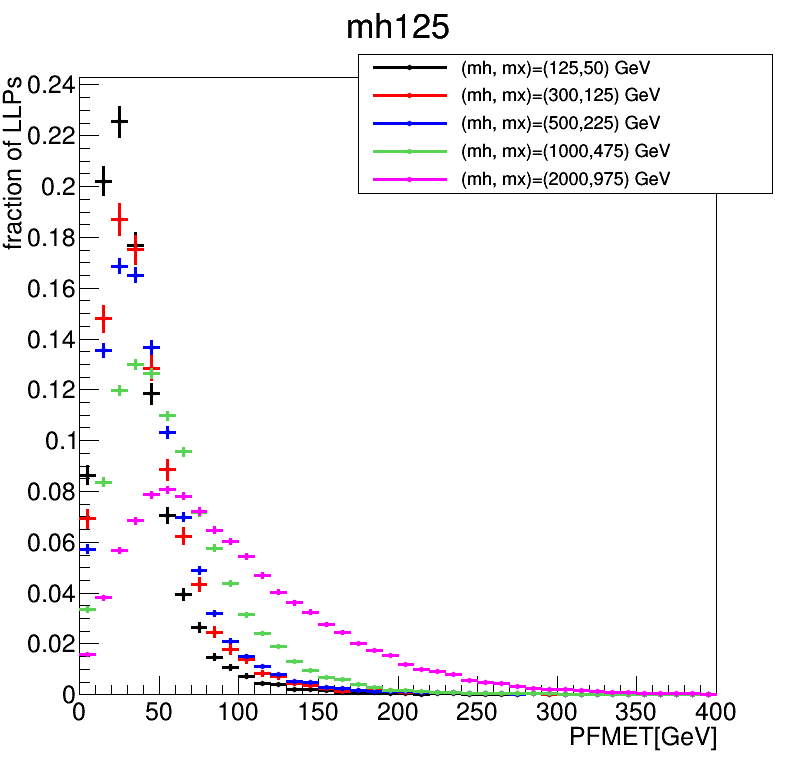

Info in <TCanvas::Print>: pdf file ../../plots/trigger_efficiency/bbbb_pfmet.pdf has been created


In [74]:
# Plotting PFMET
c = rt.TCanvas('c','c', 800, 800)
h = {}
# leg = rt.TLegend(0.50,0.75,0.97,0.93)
leg = rt.TLegend(0.45,0.75,0.97,0.93)

leg.SetTextSize(0.025)
i = 0
for k,v in pfmet.items():
#     if k[:5]=='mh125':
    if not k == 'mh125_noisr':
        h[k] = create_TH1D( v, axis_title=['PFMET[GeV]', 'fraction of LLPs'], name=k, binning=[40,0,400],weights = weight[k])
        leg.AddEntry(h[k],legend[k])
        h[k].SetMarkerColor(std_color_list[i])
        h[k].SetLineColor(std_color_list[i])
        h[k].GetYaxis().SetTitleOffset(1.5)

        h[k].DrawNormalized('same')
        i+=1
leg.Draw()
# c.SetLogy()
c.Draw()
# c.SaveAs("../../plots/trigger_efficiency/llppt_isr_mh125.pdf")
if bbbb ==1 :
    c.SaveAs("../../plots/trigger_efficiency/bbbb_pfmet.pdf")
else:
    c.SaveAs("../../plots/trigger_efficiency/metbb_pfmet.pdf")


TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c


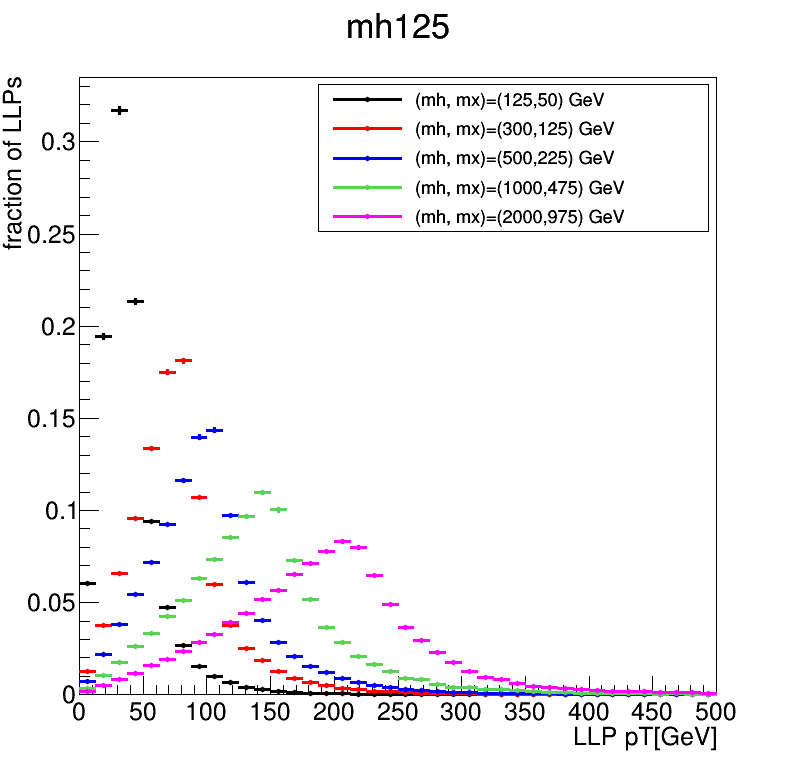

Info in <TCanvas::Print>: pdf file ../../plots/trigger_efficiency/metbb_bothllp.pdf has been created


In [52]:
# Plotting PFMET
c = rt.TCanvas('c','c', 800, 800)
h = {}
# leg = rt.TLegend(0.50,0.75,0.97,0.93)
leg = rt.TLegend(0.40,0.70,0.89,0.89)
rt.gStyle.SetOptStat(0)
leg.SetTextSize(0.025)
i = 0
for k,v in llp_pt.items():
#     if k[:5]=='mh125':
    if not k == 'mh125_noisr':
        x_input = np.concatenate((v[:,0],v[:,1]))
        weight_llp = np.concatenate((weight[k],weight[k]))
        assert(x_input.shape == weight_llp.shape)
        h[k] = create_TH1D( x_input, axis_title=['LLP pT[GeV]', 'fraction of LLPs'], name=k, binning=[40,0,500],weights = weight_llp)
        leg.AddEntry(h[k],legend[k])
        h[k].SetMarkerColor(std_color_list[i])
        h[k].SetLineColor(std_color_list[i])
        h[k].GetYaxis().SetTitleOffset(1.5)

        h[k].DrawNormalized('same')
        i+=1
leg.Draw()
# c.SetLogy()
c.Draw()
# c.SaveAs("../../plots/trigger_efficiency/llppt_isr_mh125.pdf")
if bbbb ==1 :
    c.SaveAs("../../plots/trigger_efficiency/bbbb_bothllp.pdf")
else:
    c.SaveAs("../../plots/trigger_efficiency/metbb_bothllp.pdf")


TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c


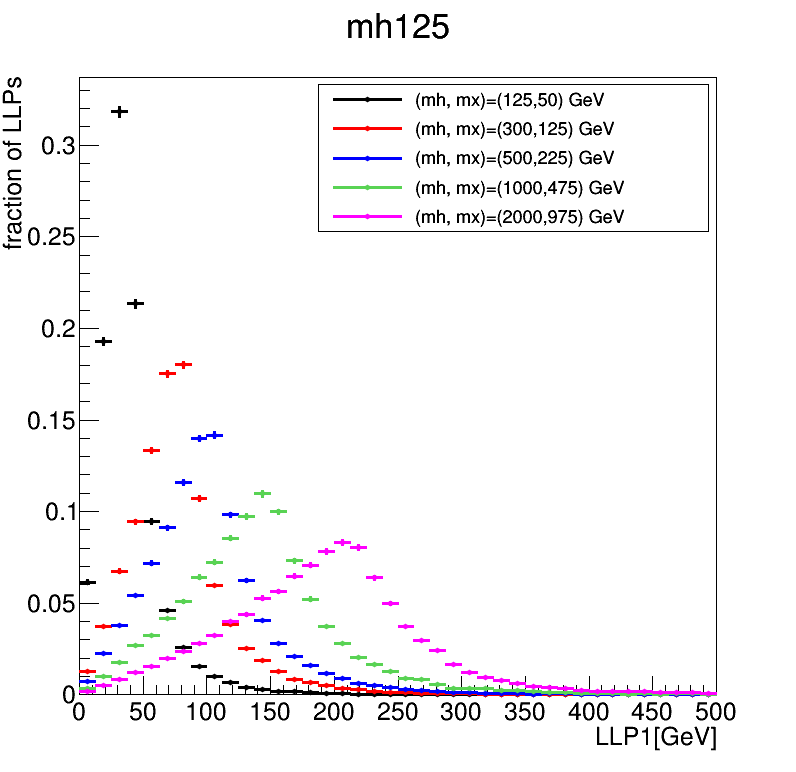

Info in <TCanvas::Print>: pdf file ../../plots/trigger_efficiency/metbb_llp1.pdf has been created


In [55]:
# Plotting PFMET
c = rt.TCanvas('c','c', 800, 800)
h = {}
# leg = rt.TLegend(0.50,0.75,0.97,0.93)
leg = rt.TLegend(0.40,0.70,0.89,0.89)

leg.SetTextSize(0.025)
llp_index = 1
i = 0
for k,v in llp_pt.items():
#     if k[:5]=='mh125':
    if not k == 'mh125_noisr':
        h[k] = create_TH1D( v[:,llp_index], axis_title=['LLP'+str(llp_index)+'[GeV]', 'fraction of LLPs'], name=k, binning=[40,0,500],weights = weight[k])
        h[k].SetMarkerColor(std_color_list[i])
        h[k].SetLineColor(std_color_list[i])
        h[k].GetYaxis().SetTitleOffset(1.5)
        leg.AddEntry(h[k],legend[k])

        h[k].DrawNormalized('same')
        i+=1
leg.Draw()
# c.SetLogy()
c.Draw()
# c.SaveAs("../../plots/trigger_efficiency/llppt_isr_mh125.pdf")
if bbbb ==1 :
    c.SaveAs("../../plots/trigger_efficiency/bbbb_llp"+str(llp_index)+".pdf")
else:
    c.SaveAs("../../plots/trigger_efficiency/metbb_llp"+str(llp_index)+".pdf")


In [ ]:
# Plotting Reco Time
c = rt.TCanvas('c','c', 800, 600)
h = {}
leg = rt.TLegend(0.68,0.70,0.97,0.93);
leg.SetTextSize(0.03)

h['mh125'] = create_TH1D( higgs_pt, axis_title=['Higgs pT [GeV]', 'events'], name=k, binning=[40,0,800],weights=weight)
#     leg.AddEntry(h[k],legend[k])
h['mh125'].Draw()
# leg.Draw()
c.SetLogy()
c.Draw()
c.SaveAs("../../plots/trigger_efficiency/higgs_pt_allmode.pdf")
# c.SaveAs("../plots/trigger_efficiency/overall_mh125_mx50_pl1000_PFMET120.pdf")

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: mh125 (Potential memory leak).
TH1D::Sumw2:0: RuntimeWarning: Sum of squares of weights structure already created
TH1D::Sumw2:0: RuntimeWarning: Sum of squares of weights structure already created
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: mh300 (Potential memory leak).
TH1D::Sumw2:0: RuntimeWarning: Sum of squares of weights structure already created
TH1D::Sumw2:0: RuntimeWarning: Sum of squares of weights structure already created
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: mh500 (Potential memory leak).
TH1D::Sumw2:0: RuntimeWarning: Sum of squares of weights structure already created
TH1D::Sumw2:0: RuntimeWarning: Sum of squares of weights structure already created
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: mh1000 (Potential memory leak).
TH1D::Sumw2:0: RuntimeWarning: Sum of squares of weights structure already 

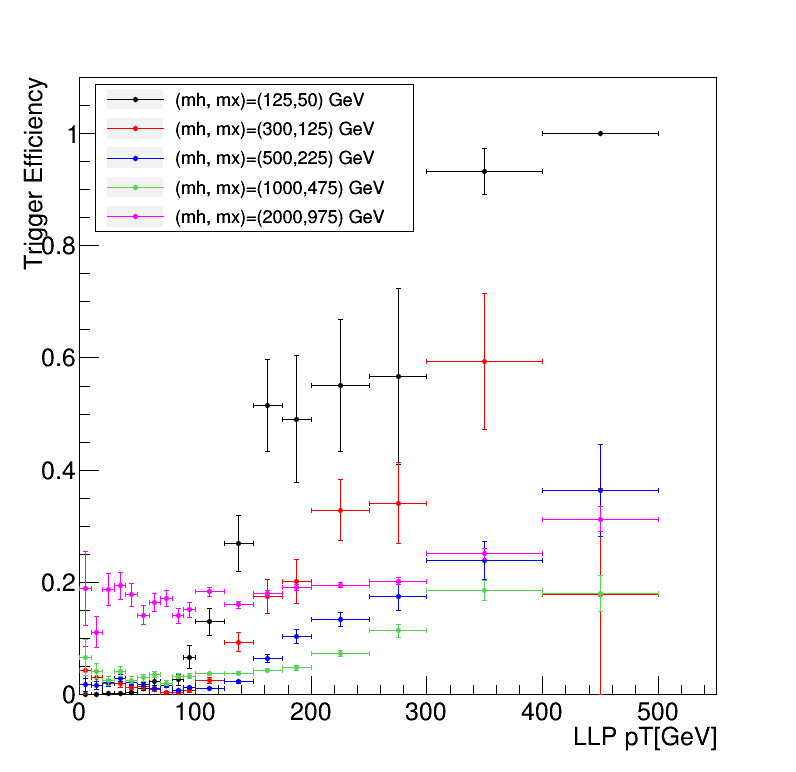

Info in <TROOT::TEfficiency::CheckEntries>: Histograms are filled with weights
Info in <TEfficiency::TEfficiency>: given histograms are filled with weights
Info in <TROOT::TEfficiency::CheckEntries>: Histograms are filled with weights
Info in <TEfficiency::TEfficiency>: given histograms are filled with weights
Info in <TROOT::TEfficiency::CheckEntries>: Histograms are filled with weights
Info in <TEfficiency::TEfficiency>: given histograms are filled with weights
Info in <TROOT::TEfficiency::CheckEntries>: Histograms are filled with weights
Info in <TEfficiency::TEfficiency>: given histograms are filled with weights
Info in <TROOT::TEfficiency::CheckEntries>: Histograms are filled with weights
Info in <TEfficiency::TEfficiency>: given histograms are filled with weights
Info in <TCanvas::Print>: pdf file ../../plots/trigger_efficiency/bbbb_trig310eff_llp0.pdf has been created


In [83]:
# efficiency vs LLP pt
c = rt.TCanvas('c','c', 800, 800)
# leg = rt.TLegend(0.47,0.20,0.95,0.43)
# leg = rt.TLegend(0.50,0.12,0.88,0.33)
leg = rt.TLegend(0.12,0.70,0.52,0.89)

leg.SetTextSize(0.025)
pEff = {}
# condition = np.logical_or(ele_bool,mu_bool)
# condition = np.ones(llp_pt.shape, dtype=int)

xaxis_title = 'LLP pT[GeV]'
# bins = [0,10,20,30,40,50,60,70,80,90,100,150,200,250]
# bins = [0,20,40,60,80,100,125,150,175,200,250,300]
bins = [0,10,20,30,40,50,60,70,80,90,100,125,150,175,200,250,300,400,500]
# bins = [50,0,500]
i = 0
llp_index = 0
for k,v in llp_pt.items():
#     if k[:5]=='mh125':
    if not k == 'mh125_noisr':
        trig = trigger_decision[k][310] 
        
        hm = create_TH1D(v[:,llp_index], k, axis_title = [xaxis_title,'Trigger Efficiency'], binning=bins,weights = weight[k]*trig)
        hb = create_TH1D(v[:,llp_index], k, axis_title = [xaxis_title,'Trigger Efficiency'], binning=bins,weights = weight[k])
        pEff[k] = rt.TEfficiency(hm,hb)
        pEff[k].SetLineColor(std_color_list[i])
        pEff[k].SetMarkerColor(std_color_list[i])

        leg.AddEntry(pEff[k],legend[k])
        if i == 0:
            pEff[k].Draw('')
        else:
            pEff[k].Draw('same')
        i += 1


leg.Draw()
c.Draw()
pEff['mh125'].GetPaintedGraph().GetYaxis().SetTitleOffset(1.5)
pEff['mh2000'].GetPaintedGraph().GetYaxis().SetRangeUser(0,2)
if bbbb ==1 :
    c.SaveAs("../../plots/trigger_efficiency/bbbb_trig310eff_llp"+str(llp_index)+".pdf")
else:
    c.SaveAs("../../plots/trigger_efficiency/metbb_trig310eff_llp"+str(llp_index)+".pdf")
# print(weight[mu_bool]*trigger_decision[tr][mu_bool])

In [ ]:
# efficiency vs LLP pt
c = rt.TCanvas('c','c', 800, 800)
# leg = rt.TLegend(0.47,0.20,0.95,0.43)
leg = rt.TLegend(0.20,0.90,0.58,0.99)

leg.SetTextSize(0.02)
pEff = {}
condition = np.logical_or(ele_bool,mu_bool)
print(type(condition))
xaxis_title = 'LLP pT[GeV]'
# bins = [0,10,20,30,40,50,60,70,80,90,100,150,200,250]
bins = [0,20,40,60,80,100,125,150,200,250,300]
# bins = [0,10,20,30,40,50,60,70,80,90,100,125,150,175,200,250,300,400,500] #for bbbb
# bins = [50,0,500]
i = 0
for k,v in llp_pt.items():
#     if k[:5]=='mh125':
    if k == 'mh125' or k == 'mh1000' or k == 'mh2000':
        trig = np.logical_or(trigger_decision[k][84], trigger_decision[k][136])
        print(np.count_nonzero(condition[k]))
        hm = create_TH1D(v[condition[k]], k, axis_title = [xaxis_title,'Trigger Efficiency'], binning=bins,weights = weight[k][condition[k]]*trig[condition[k]])
        hb = create_TH1D(v[condition[k]], k, axis_title = [xaxis_title,'Trigger Efficiency'], binning=bins,weights = weight[k][condition[k]])
        
        pEff[k] = rt.TEfficiency(hm,hb)
        pEff[k].SetLineColor(std_color_list[i])
        leg.AddEntry(pEff[k],legend[k])
        if i == 0:
            pEff[k].Draw('')
        else:
            pEff[k].Draw('same')
        i += 1


leg.Draw()
c.Draw()
pEff['mh125'].GetPaintedGraph().GetYaxis().SetRangeUser(0,2)
# c.SaveAs("../../plots/trigger_efficiency/bbbb_trig310.pdf")

# print(weight[mu_bool]*trigger_decision[tr][mu_bool])

# jetT for different mass point 

In [ ]:
reco_time = OrderedDict()
reco_time_matched = OrderedDict()
max_reco_time_matched = OrderedDict()
gen_time = OrderedDict()
for k,T in tree.items():
    reco_time_matched[k] = []
    max_reco_time_matched[k] = []
    gen_time[k] = []
#     reco_time[k] = np.array([x[0] if len(x) else -1 for x in T['jet_rechit_T_Ecut1'].array()])
    rechit_T_1 = T['jet_rechit_T_Ecut1'].array()
    gen_time_var = T['gen_time'].array()
    gLLP_daughter_match_jet_index = T['gLLP_daughter_match_jet_index'].array()
    gLLP_daughter_travel_time = T['gLLP_daughter_travel_time'].array()
    jetPt = T['jetPt'].array()
    matched_jets = np.logical_and(np.logical_not( gLLP_daughter_travel_time == -666), np.logical_not( gLLP_daughter_match_jet_index == 666))
    nEvents = len(T['eventNum'].array())

    for i in range(nEvents): #loop through each event
        max_pt = 0
        max_pt_index = 666
        for j in range(4): #loop through each gen particle
            index = gLLP_daughter_match_jet_index[i][j]
            if not index == 666 and matched_jets[i][j]: #matched and barrel jets
                reco_time_matched[k].append(rechit_T_1[i][index])
                gen_time[k].append(gen_time_var[i][j])
                pt = jetPt[i][index]
                if pt > max_pt:
                    max_pt_index = index
                    max_pt = pt
        if not max_pt == 0:
            max_reco_time_matched[k].append(rechit_T_1[i][max_pt_index])

    print(k)
                   

In [ ]:
c = rt.TCanvas('c','c', 800, 600)
h = {}
leg = rt.TLegend(0.60,0.75,0.95,0.94);
leg.SetTextSize(0.03)
leg.SetEntrySeparation(0.01)

i = 0
for k,v in reco_time_matched.items():
    if not k == 'mh125_noisr':
        h[k] = create_TH1D( v, axis_title=['Reco time [ns]', 'events'], name=k, binning=[100,-10,15])
        h[k].SetLineColor(std_color_list[i])
        h[k].DrawNormalized('same')
        leg.AddEntry(h[k],legend[k])
        i += 1
c.SetLogy()
leg.Draw()
# rt.enableJSVis()
c.Draw()
# c.SaveAs('../plots/reco_time_matched_vbfh_ISR_different_mass.pdf')

In [ ]:
c = rt.TCanvas('c','c', 800, 600)
h = {}
leg = rt.TLegend(0.60,0.75,0.95,0.94);
leg.SetTextSize(0.03)
leg.SetEntrySeparation(0.01)

i = 0
for k,v in max_reco_time_matched.items():
    h[k] = create_TH1D( v, axis_title=['Reco time [ns]', 'events'], name=k, binning=[100,-10,15])
    h[k].SetLineColor(std_color_list[i])
    h[k].DrawNormalized('same')
    leg.AddEntry(h[k],legend[k])
    i += 1
c.SetLogy()
leg.Draw()
# rt.enableJSVis()
c.Draw()
# c.SaveAs('../plots/reco_time_matched_vbfh_ISR_different_mass.pdf')